In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn import model_selection
from sklearn.datasets import load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
def omp_regression(X, y, T):
    A = []
    B = np.arange(X.shape[1])
    r=y
    beta = np.zeros((X.shape[1],T)) #beta is an empty array in the shape of DxT
    for i in range(T):
        #get the index of the colum contributing the most
        j=np.argmax(np.abs(X[:,B].T@y))
        A.append(j)
         #move that coum index to the active matrix and delete it from the inactive matrix
        B = np.delete(B,j)

        #for each t(here index i ) set the values of beta to the solution of the OLS equation
        #for solving the OLs equation we just take the active rows of X
        # The OLS equation is easily solved with the pseudo inverse as we showed in the lecture
        beta[A,i]=np.linalg.pinv([X[:,A]])@y

        # updating the residuals taking the active matrix is not necessary as beta is 0 anyway for all inactive coulums of X
        r = y - X@beta[:,i]
    return beta



def pred(X,beta,T):
    return np.sign(X @ beta[:,T])

<div style="color: green; font-weight:
bold">very good!</div>

In [ ]:
digits = load_digits ()

data = digits [ "data" ]
images = digits [ "images" ]
target = digits [ "target" ]
target_names = digits [ "target_names" ]

data_3_9 = data[(target==3) | (target==9)]
images_3_9 = images[(target==3) | (target==9)]
target_3_9 = target[(target==3) | (target==9)]

x_all = data_3_9
y_all = target_3_9
X_train , X_test , y_train , y_test = model_selection.train_test_split(data_3_9, target_3_9 ,test_size = 0.2 , random_state = 0)

y_train = np.where(y_train == 3 ,-1,1)
y_test = np.where(y_test == 3 ,-1,1)


Text(0.5, 1.0, 'Image of a 9 as comparison')

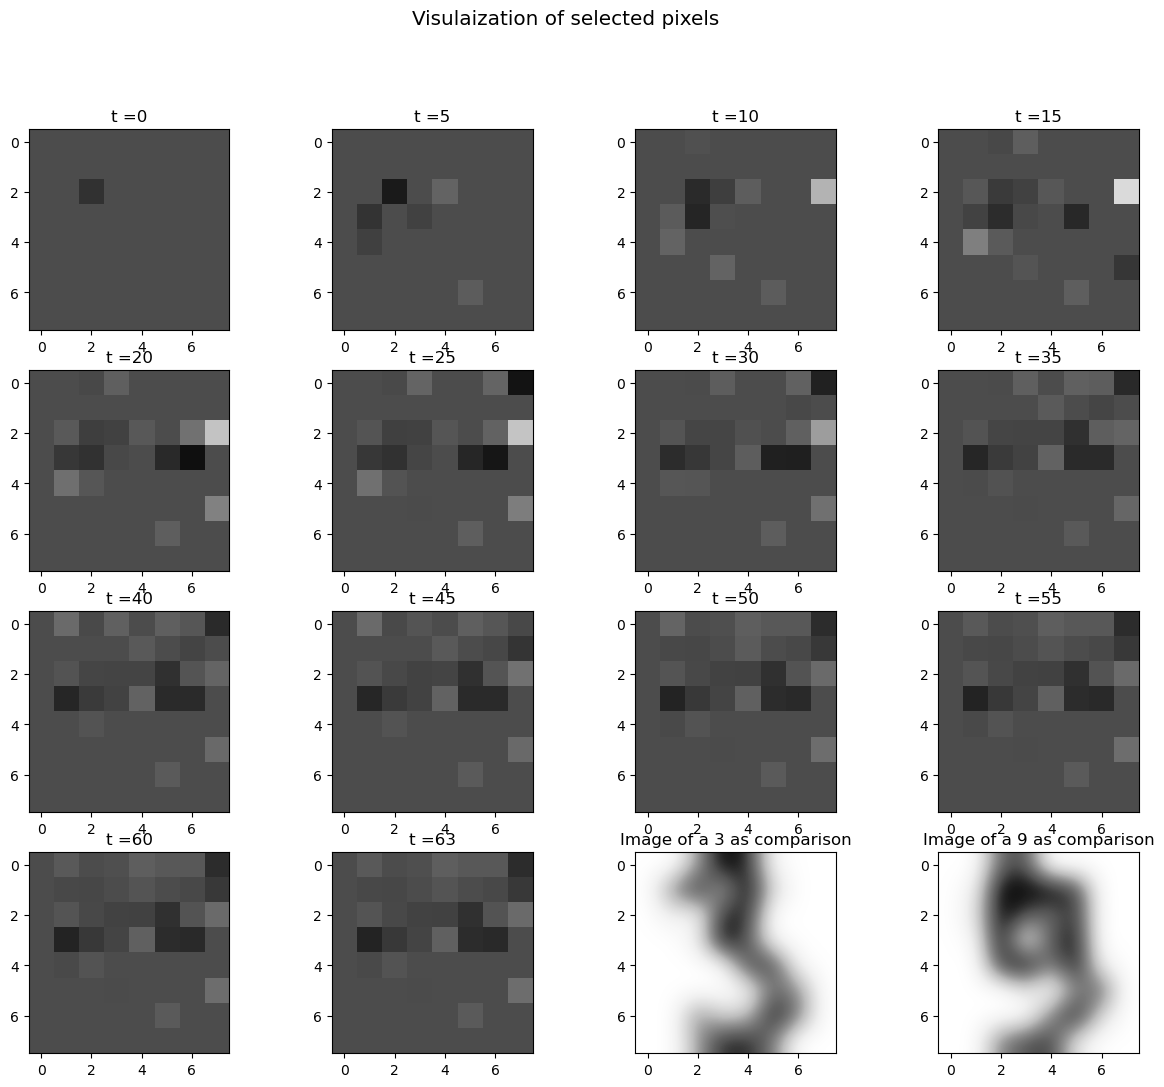

In [ ]:
T=64
beta = omp_regression(X_train,y_train,T)
errorrate = []
fig, ax = plt.subplots(4,4)
st = fig.suptitle("Visulaization of selected pixels", fontsize="x-large")
fig.set_figheight(12)
fig.set_figwidth(15)
v_min = np.min(beta)
v_max = np.max(beta)

for i in range(T):
    #plotting the different steps of pixel/feature selection
    if i%5 == 0:
        active_pxls = beta[:,i].reshape(8,8)
        ax.ravel()[int(i/5)].imshow(active_pxls,vmin = v_min,vmax = v_max, cmap = 'Greys',interpolation='nearest')
        ax.ravel()[int(i/5)].set_title("t =%s" %(i))
    elif(i==63):
        active_pxls = beta[:,i].reshape(8,8)
        ax.ravel()[13].imshow(active_pxls,cmap = 'Greys',vmin = v_min,vmax = v_max,interpolation='nearest')
        ax.ravel()[13].set_title("t =%s" %(i))

       # computing the errorrate
    prediction = pred(X_test,beta,i)
    er = np.sum(prediction != y_test)/np.size(y_test)
    errorrate.append(er)

#Plotting a 3 a nd a 9 to get an idea where which pixel is
ax.ravel()[14].imshow(images_3_9[0],cmap = 'Greys',interpolation='bicubic')
ax.ravel()[14].set_title("Image of a 3 as comparison")
ax.ravel()[15].imshow(images_3_9[1],cmap = 'Greys',interpolation='bicubic')
ax.ravel()[15].set_title("Image of a 9 as comparison")


As one can see, the feature selection is manly ceneter around the upper center part of the image. There also lies the biggest difference between a 3 and a 9 eg. closing the circle for the 9. This feature region is therefore activated first by the OMP. The error rate shows us that we reach errorrates under 10% after already.
Of course this a little worse error rate as we had it in our custom feature selcetion as we did include mixing of features to create new features which is not done here.

Still this methods proves very effetive to automatically detect the most important pixels.

<div style="color: green; font-weight:
bold">basically the same as sample solution. maybe use sth else (like in the sample solution) than a loop to optimize your code </div>

Text(0, 0.5, 'errorrate')

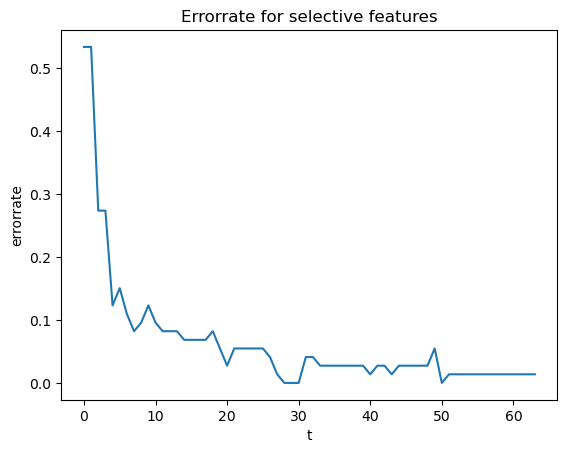

In [ ]:
plt.plot(errorrate)
plt.title("Errorrate for selective features")
plt.xlabel("t")
plt.ylabel("errorrate")